<a href="https://colab.research.google.com/github/dguhamba/Data-Visualization/blob/main/LeadScoring_Mar13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Lead scoring assignment

In [1]:
# Importing libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Mounting on google colab
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/Colab Notebooks")
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks


In [59]:
# Reading in data
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [41]:
# Shape of data:
leads.shape

(9240, 37)

In [42]:
# Checking for missing data
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [43]:
100*leads.isnull().sum()/leads.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

To drop the below columns as the missing values were above 40%:
- Asymmetrique Activity Index
- Asymmetrique Profile Index  
- Asymmetrique Activity Score 
- Asymmetrique Profile Score **bold text**

In [44]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [60]:
# Dropping columns
leads1 = leads.drop(labels = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Lead Quality'], axis = 1)

In [61]:
leads1.shape

(9240, 32)

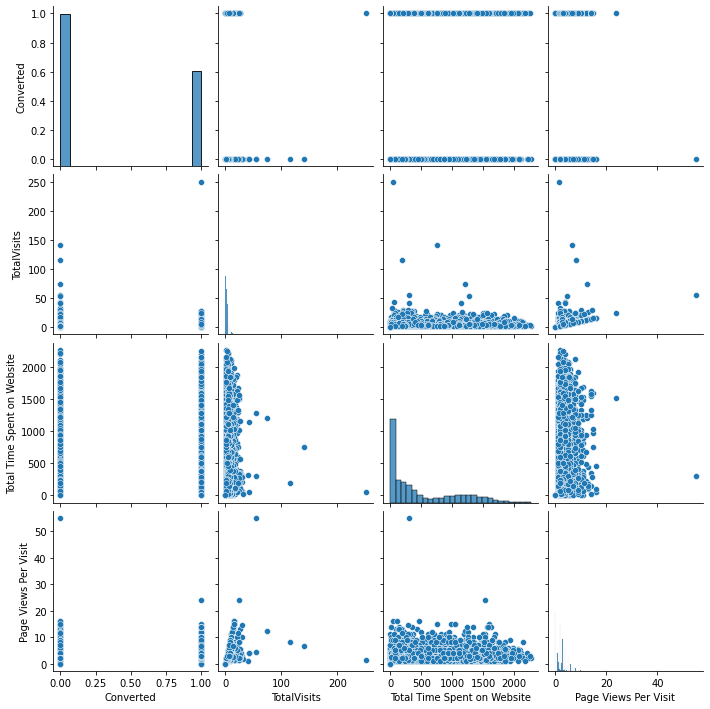

In [47]:
# Visualizing numeric data
num_var = leads1[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
num_var.head()

sns.pairplot(num_var)
plt.show()

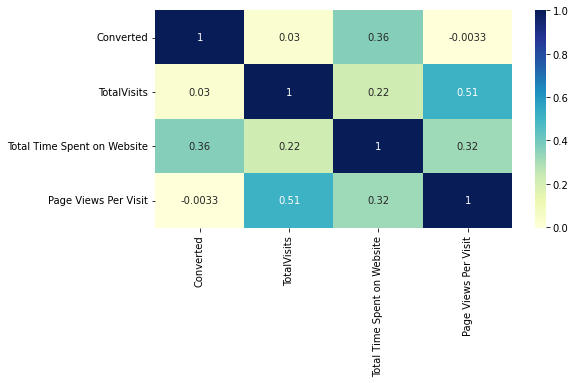

In [48]:
plt.figure(figsize = (8,4))
sns.heatmap(num_var.corr(),annot=True,cmap='YlGnBu')
plt.show()

**From the above, the variable 'Time Spent on Website' has positive correlation with the target variable 'Converted'.**

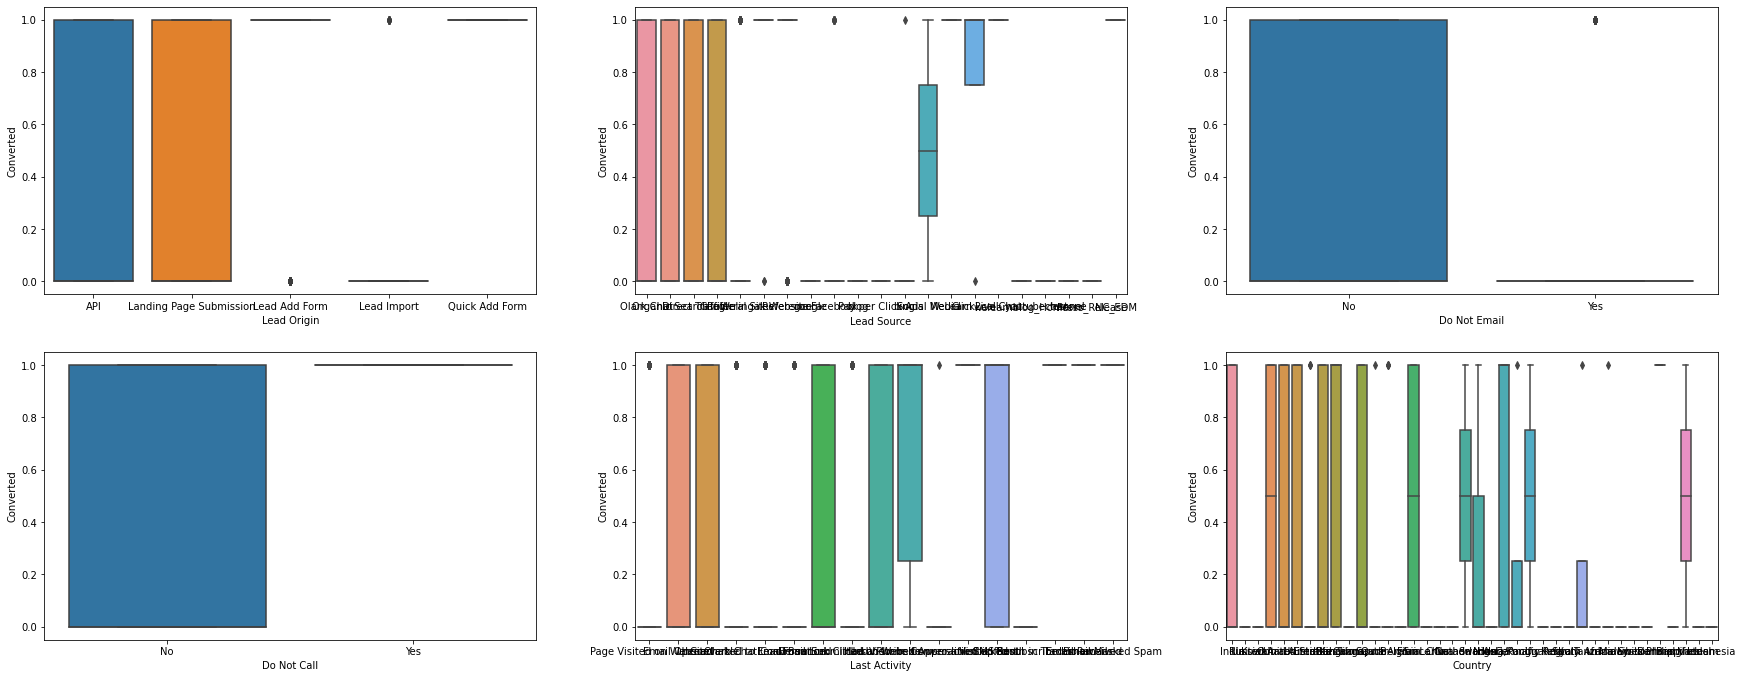

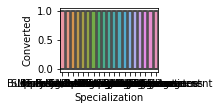

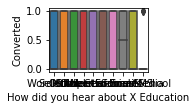

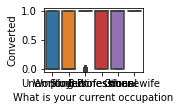

In [49]:
# Visualizing categorical variables

plt.figure(figsize = (30,18))
plt.subplot(3,3,1)
sns.boxplot(x='Lead Origin', y='Converted', data=leads1)

plt.subplot(3,3,2)
sns.boxplot(x='Lead Source', y='Converted', data=leads1)

plt.subplot(3,3,3)
sns.boxplot(x='Do Not Email', y='Converted', data=leads1)

plt.subplot(3,3,4)
sns.boxplot(x='Do Not Call', y='Converted', data=leads1)

plt.subplot(3,3,5)
sns.boxplot(x='Last Activity', y='Converted', data=leads1)

plt.subplot(3,3,6)
sns.boxplot(x='Country', y='Converted', data=leads1)
plt.show()

plt.subplot(3,3,7)
sns.boxplot(x='Specialization', y='Converted', data=leads1)
plt.show()

plt.subplot(3,3,8)
sns.boxplot(x='How did you hear about X Education', y='Converted', data=leads1)
plt.show()

plt.subplot(3,3,9)
sns.boxplot(x='What is your current occupation', y='Converted', data=leads1)
plt.show()

In [ ]:
# Data Preparation

In [50]:
# Converting binary vaariables to Yes/ No (1, 0)
bi_var = ['Do Not Email', 'Do Not Call', 'Receive More Updates About Our Courses', 'Search', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining map_function
def binary_map(x):
      return x.map({'Yes': 1, 'No':0})

# Applying map_function:
leads1[bi_var] = leads[bi_var].apply(binary_map)

leads1[bi_var].head()

,Do Not Email,Do Not Call,Receive More Updates About Our Courses,Search,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [ ]:
leads1.head()

In [70]:
# Rationalizing the levels in categorical variables
leads1['Lead Source'].value_counts(normalize=True)

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Other             0.096045
Name: Lead Source, dtype: float64

In [66]:
#df['Education'].replace(['Under-Graduate', 'Diploma '], 
                        #[0, 1], inplace=True)


leads1['Lead Origin'].replace(['Lead Add Form', 'Lead Import', 'Quick Add Form'],
                              ['Other', 'Other', 'Other'], inplace=True)



In [69]:
leads1['Lead Source'].replace(['Reference','Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'google', 'Click2call', 'Press_Release', 'Social Media','Live Chat', 'youtubechannel', 'testone', 'Pay per Click Ads', 
                     'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'],
                              ['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'], inplace=True)




In [72]:
cat_var1 = leads1[['Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 
                  'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                  'Digital Advertisement', 'Through Recommendations','Tags', 'Lead Profile', 'City', 'Last Notable Activity']]

In [74]:
cat_var1.value_counts(normalize=True)

Last Activity               Country  Specialization        How did you hear about X Education  What is your current occupation  What matters most to you in choosing a course  Search  Magazine  Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  Through Recommendations  Tags                                 Lead Profile           City    Last Notable Activity
Email Opened                India    Select                Select                              Unemployed                       Better Career Prospects                        No      No        No                 No                  No         No                     No                       Ringing                              Select                 Select  Email Opened             0.013671
SMS Sent                    India    Select                Select                              Unemployed                       Better Career Prospects                        No      No        No                 No            

In [ ]:
# To convert 'Select' in columns to Null or NaN; in case more classes of fewer values are present, to convert these to 'Other

In [ ]:
# Then do EDA, create dummy variables, transform variables, etc

Enter two numbers: 5, 10
x value before swapping:  5
y value before swapping: 10


x value after swapping: 10
y value after swapping: 5


1 99


1288
Even


In [ ]:
# Alarm Clock
# You're trying to automate your alarm clock by writing a function for it. You're given a day of the week encoded as 1=Mon, 2=Tue, ... 6=Sat, 7=Sun, and 
#whether you are on vacation as a boolean value (a boolean object is either True or False. Google "booleans python" to get a better understanding). 
#Based on the day and whether you're on vacation, write a function that returns a time in form of a string indicating when the alarm clock should ring. 

#When not on a vacation, on weekdays, the alarm should ring at "7:00" and on the weekends (Saturday and Sunday) it should ring at "10:00". 

#While on a vacation, it should ring at "10:00" on weekdays. On vacation, it should not ring on weekends, that is, it should return "off".

# ----------------------------------------------------------------------
#Input: 
#The input will be a list of two elements. The first element will be an integer from 1 to 7, and the second element will be a boolean value.

#Output:
#The output will be a string denoting the time alarm will ring or 'off'

In [ ]:
def set_alarm(day, on_vacation):
  if (on_vacation):
      if day<=5:
        alarm_msg = '10:00 am'
      else:
        alarm_msg = 'off'  
    
  else:
      if day<=5:
        alarm_msg = '7:00 am'
      else:
        alarm_msg = '10:00 am'
  
  print(alarm_msg)
  return(alarm_msg)
  

In [ ]:
set_alarm(6,False)


10:00 am


'10:00 am'

In [ ]:
# Factorial

In [ ]:
# Reverse the digits

In [ ]:
# How many chocolates

In [ ]:
# Print the pattern

In [ ]:
input1 = int(input())
mystr =[]
for i in range(1, input1+1):
    mystr.append('_'*(input1-i) + '*'*i)
    
mystr

for j in range(len(mystr)):
  print(mystr[j], end = '\n')  


5
____*
___**
__***
_****
*****
